# 线性回归

回归（regression）是能为⼀个或多个⾃变量与因变量之间关系建模的⼀类⽅法。在机器学习领域中的⼤多数任务通常都与预测（prediction）有关。



## 1.1 线性模型

线性假设是指⽬标（房屋价格）可以表⽰为特征（⾯积和房龄）的加权和，如下⾯的式⼦：   
公式中，的warea和wage 称为权重（weight），权重决定了每个特征对我们预测值的影响。b称为偏置（bias）、偏移量（offset）或截距（intercept）。  
偏置是指当所有特征都取值为0时，预测值应该为多少。即使现实中不会有任何房⼦的⾯积是0或房龄正好是0年，我们仍然需要偏置项。如果没有偏置项，我们模型的表达能⼒将受到限制。

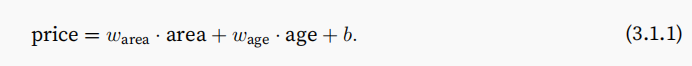

在机器学习领域，我们通常使⽤的是⾼维数据集，建模时采⽤线性代数表⽰法会⽐较⽅便。当我们的输⼊包含d个特征时，我们将预测结果yˆ （通常使⽤“尖⻆”符号表⽰y的估计值）表⽰为：

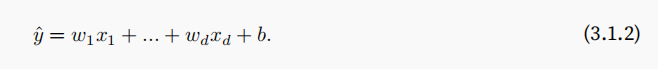

将所有特征放到向量x ∈ Rd中，并将所有权重放到向量w ∈ Rd中，我们可以⽤点积形式来简洁地表达模型：

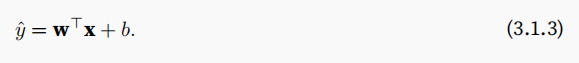

向量x对应于单个数据样本的特征。⽤符号表⽰的矩阵X ∈ Rn×d 可以很⽅便地引⽤我们整个数据集的n个样本。其中，X的每⼀⾏是⼀个样本，每⼀列是⼀种特征。  
对于特征集合X，预测值yˆ ∈ Rn 可以通过矩阵-向量乘法表⽰为：  

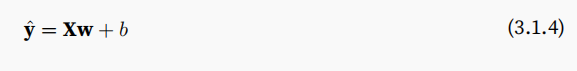

给定训练数据特征X和对应的已知标签y，线性回归的⽬标是找到⼀组权重向量w和偏置b：当给定从X的同分布中取样的新样本特征时，这组权重向量和偏置能够使得新样本预测标签的误差尽可能⼩。

## 1.2 损失函数

考虑如何⽤模型拟合（fit）数据之前，我们需要确定⼀个拟合程度的度量。损失函数（loss function）能够量化⽬标的实际值与预测值之间的差距。通常我们会选择⾮负数作为损失，且数值越⼩表⽰损失越⼩，完美预测时的损失为0。回归问题中最常⽤的损失函数是平⽅误差函数。当样本i的预测值为yˆ(i)，其相应的真实标签为y(i)时，平⽅误差可以定义为以下公式：

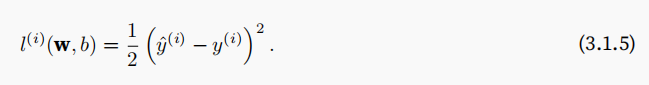

由于平⽅误差函数中的⼆次⽅项，估计值y(i)和观测值y(i)之间较⼤的差异将导致更⼤的损失。为了度量模型在整个数据集上的质量，我们需计算在训练集n个样本上的损失均值（也等价于求和）。

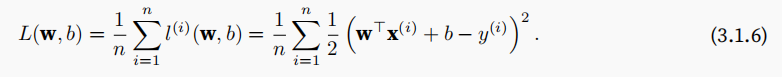

在训练模型时，我们希望寻找⼀组参数（w∗, b∗），这组参数能最⼩化在所有训练样本上的总损失。如下式：

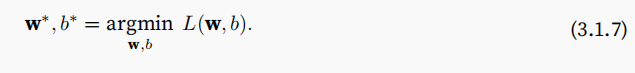

## 1.3 解析解

线性回归刚好是⼀个很简单的优化问题。与我们将在本书中所讲到的其他⼤部分模型不同，线性回归的解可以⽤⼀个公式简单地表达出来，这类解叫作解析解（analytical solution）。⾸先，我们将偏置b合并到参数w中，合并⽅法是在包含所有参数的矩阵中附加⼀列。我们的预测问题是最⼩化∥y − Xw∥2。这在损失平⾯上只有⼀个临界点，这个临界点对应于整个区域的损失极⼩点。将损失关于w的导数设为0，得到解析解：  
（像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。解析解可以进⾏很好的数学分
析，但解析解对问题的限制很严格，导致它⽆法⼴泛应⽤在深度学习⾥。）

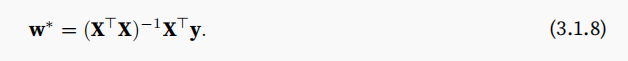

## 1.4 随机梯度下降

梯度下降（gradient descent），这种⽅法⼏乎可以优化所有深度学习模型。它通过不断地在损失函数递减的⽅向上更新参数来降低误差。梯度下降最简单的⽤法是计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这⾥也可以称为梯度）。但实际中的执⾏可能会⾮常慢：因为在每⼀次更新参数之前，我们必须遍历整个数据集。因此，我们通常会在每次需要计算更新的时候随机抽取⼀⼩批样本，这种变体叫做⼩批量随机梯度下降（minibatch stochastic gradient descent）。

在每次迭代中，我们⾸先随机抽样⼀个⼩批量B，它是由固定数量的训练样本组成的。然后，我们计算⼩批量的平均损失关于模型参数的导数（也可以称为梯度）。最后，我们将梯度乘以⼀个预先确定的正数η，并从当前参数的值中减掉。  
我们⽤下⾯的数学公式来表⽰这⼀更新过程（∂表⽰偏导数）：

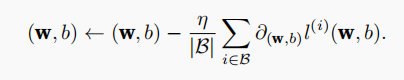

算法的步骤：
* 初始化模型参数的值，如随机初始化；
* 从数据集中随机抽取⼩批量样本且在负梯度的⽅向上更新参数，并不断迭代这⼀步骤。  
对于平⽅损失和仿射变换，我们可以明确地写成如下形式:  
* |B|表⽰每个⼩批量中的样本数，这也称为批量⼤⼩（batch size）
* η表⽰学习率（learning rate）  
批量⼤⼩和学习率的值通常是⼿动预先指定，⽽不是通过模型训练得到的。这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）。  
超参数通常是我们根据训练迭代结果来调整的，⽽训练迭代结果是在独⽴的验证数据集（validation dataset）上评估得到的。

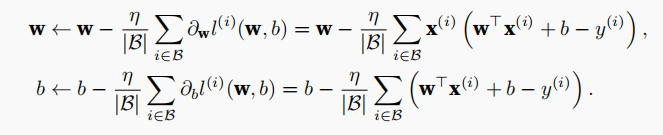

事实上，更难做到的是找到⼀组参数，这组参数能够在我们从未⻅过的数据上实现较低的损失，这⼀挑战被称为泛化（generalization）。

## 1.5 矢量化加速

在训练的模型时，经常希望能够同时处理整个⼩批量的样本。为了实现这⼀点，需要我们对计算进⾏⽮量化，从⽽利⽤线性代数库，⽽不是在Python中编写开销⾼昂的for循环。

In [2]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l
n = 10000
a = torch.ones([n])
b = torch.ones([n])

#定义⼀个计时器
class Timer: #@save
    """记录多次运⾏时间"""
    def __init__(self):
        self.times = []
        self.start()
    def start(self):
        """启动计时器"""
        self.tik = time.time()
    def stop(self):
        """停⽌计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)
    def sum(self):
        """返回时间总和"""
        return sum(self.times)
    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

#使⽤for循环，每次执⾏⼀位的加法
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.12211 sec'

In [6]:
#使⽤重载的+运算符来计算按元素的和
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00000 sec'

## 1.6 正态分布与平方损失

接下来，通过对噪声分布的假设来解读平⽅损失⽬标函数。  
正态分布概率密度函数如下：

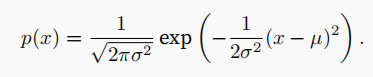

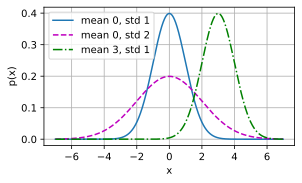

In [3]:
#正态分布函数
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

#可视化
# 再次使⽤numpy进⾏可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

就像我们所看到的，改变均值会产⽣沿x轴的偏移，增加⽅差将会分散分布、降低其峰值。均⽅误差损失函数（简称均⽅损失）可以⽤于线性回归的⼀个原因是：我们假设了观测中包含噪声，其中噪声服从正态分布。噪声正态分布如下式:

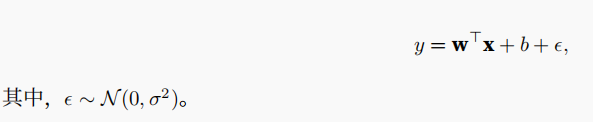

通过给定的x观测到特定y的似然（likelihood）：

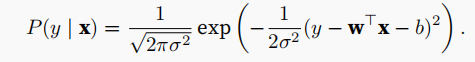

根据极⼤似然估计法，参数w和b的最优值是使整个数据集的似然最⼤的值：

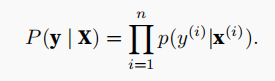

最⼩化负对数似然− log P(y | X)：  
因此，在⾼斯噪声的假设下，最⼩化均⽅误差等价于对线性模型的极⼤似然估计。

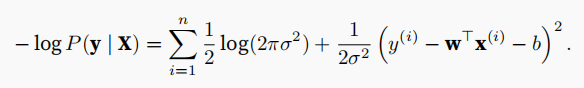